## Lab 1.2 Build a neural network using built-in packages

In [218]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [219]:
# load training data (originally from: https://archive.ics.uci.edu/ml/datasets/iris)
data_train = pd.read_csv('dataset/iris_train.csv')

# convert target classes to numeric values, i.e.:
# -- Iris Setosa: Iris-setosa as class 0
# -- Iris Versicolour: Iris-versicolor as class 1
# -- Iris Virginica: Iris-virginica as class 2
data_train.at[data_train['species'] == 'Iris-setosa',['species']] = 0
data_train.at[data_train['species'] == 'Iris-versicolor', ['species']] = 1
data_train.at[data_train['species'] == 'Iris-virginica', ['species']] = 2

# convert all strings to numeric values
data_train = data_train.apply(pd.to_numeric)

print(data_train)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.4           1.5          0.2        0
1             6.3          2.5           5.0          1.9        2
2             5.9          3.0           4.2          1.5        1
3             5.7          2.6           3.5          1.0        1
4             7.7          2.8           6.7          2.0        2
..            ...          ...           ...          ...      ...
115           5.6          2.5           3.9          1.1        1
116           6.4          2.9           4.3          1.3        1
117           7.9          3.8           6.4          2.0        2
118           5.4          3.0           4.5          1.5        1
119           5.5          3.5           1.3          0.2        0

[120 rows x 5 columns]


_**Q1. How many features (inputs) are there?**_

_**Q2. How many classes (outputs) are there?**_

_**Q3. How many data instances are there?**_

Q1. 4 inputs/features i.e. sepal length and width, petal length and width

Q2. 3 outputs/classes i.e. species 0, 1, and 2

Q3. 120 inputs/features i.e. 0 to 119 rows

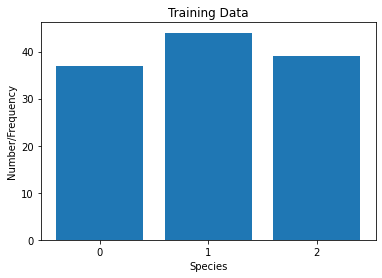

In [220]:
# visualize data distribution
# extract frequency of each species class
class_freq = data_train['species'].value_counts()
# convert to sorted list using index 0, 1, 2
class_freq = list(class_freq.sort_index())

# x label 
x_axis = list(range(0, 3))

# bar chart of data
graph = plt.bar(x_axis, class_freq)
# axis settings
plt.xticks(x_axis)
plt.xlabel('Species')
plt.ylabel('Number/Frequency')
plt.title('Training Data')

plt.show()


In [221]:
# convert pandas DataFrame type to array
# to lookup type use print(type(data_train)) or if use vscode 'show varibles' function on top
# remember the first four cols are features and the last is class
data_train_array = data_train.values

# split into features x and target y
x_array = data_train_array[:, :4]
y_array = data_train_array[:, 4]

# create tensors(to be handled efficiently by GPU) to hold inputs and outputs. 
X = torch.tensor(x_array, dtype=torch.float)

# Y must be scalar type long for network learning
Y = torch.tensor(y_array, dtype=torch.long)


In [222]:
# define the number of neurons for input layer, hidden layer and output layer; define learning rate and number of epochs to train
input_neurons = 4

# think about how to choose number of hidden neuron 
hidden_neurons = 10

output_neurons = 3

# how to decide learning rate here
learning_rate = 0.01

num_epochs = 500

In [223]:
# define the structure of nn (neural network)
net = torch.nn.Sequential(
    torch.nn.Linear(input_neurons, hidden_neurons),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_neurons, output_neurons),
)

# define loss functions
loss_func = torch.nn.CrossEntropyLoss()

# define optimiser
optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [224]:
# store all losses for visulization
all_losses = []

# train a nn
for epoch in range(num_epochs):
    # perform forward pass: compute predicted y by passing x to the model. here we pass a tensor of input data X to the module and it produces a tensor of output data Y_pred
    Y_pred = net(X)

    # compute loss by passing predicted Y_pred and actual Y to the loss functions defined before
    loss = loss_func(Y_pred, Y)
    all_losses.append(loss.item())

    # show progress every 50 epochs
    if epoch % 50 == 0:
        #convert three-col Y_pred values to one col for comparison: choose the max value as indicated class of three possible predictions
        _, predicted = torch.max(F.softmax(Y_pred, 1), 1)

        # calculate accuracy
        total = predicted.size()
        correct = predicted.data.numpy() == Y.data.numpy()
        print('Epoch [%d/%d] Loss: %.4f Accuracy: %.2f %%' % (epoch+1, num_epochs, loss.item(), 100*sum(correct)/total))

    # clear gradients before running backward pass
    net.zero_grad()

    # perform backward pass: compute gradient of loss wrt all learnable params of model
    loss.backward()

    # call step function on optimiser to make an update to its params
    optimiser.step()

Epoch [1/500] Loss: 1.1048 Accuracy: 36.67 %
Epoch [51/500] Loss: 1.0826 Accuracy: 36.67 %
Epoch [101/500] Loss: 1.0626 Accuracy: 36.67 %
Epoch [151/500] Loss: 1.0431 Accuracy: 36.67 %
Epoch [201/500] Loss: 1.0238 Accuracy: 36.67 %
Epoch [251/500] Loss: 1.0043 Accuracy: 37.50 %
Epoch [301/500] Loss: 0.9839 Accuracy: 62.50 %
Epoch [351/500] Loss: 0.9619 Accuracy: 70.83 %
Epoch [401/500] Loss: 0.9377 Accuracy: 80.00 %
Epoch [451/500] Loss: 0.9113 Accuracy: 89.17 %


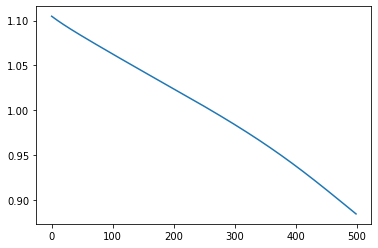

In [225]:
# plot loss
plt.figure()
plt.plot(all_losses)
plt.show()

In [226]:
# use confusion matrix to show how well the network performs
confusion = torch.zeros(output_neurons, output_neurons)

for i in range(Y.size(0)):
    actual_class = Y.data[i]
    predicted_class = predicted.data[i]

    confusion[actual_class][predicted_class] += 1

print('Confusion matrix for training:\n', confusion.numpy())

Confusion matrix for training:
 [[37.  0.  0.]
 [ 0. 44.  0.]
 [ 0. 13. 26.]]


_**Q4: What is the training accuracy?**_

_**Q5: What does the confusion matrix tell you?**_

Q4: For epochs of 500, the training accuracy is around 95% (answer differs every time)

Q5: The confusion matrix tells us that the model can recognize well on class 0 and 2 with 100% percentage accuracy, but it confused 6 out of 44 as class 2 which actually belong to class 1.

In [227]:
# load testing data
data_test = pd.read_csv('dataset/iris_test.csv')

# convert strings to numeric, same as before with data_train
data_test.at[data_test['species'] == 'Iris-setosa',['species']] = 0
data_test.at[data_test['species'] == 'Iris-versicolor', ['species']] = 1
data_test.at[data_test['species'] == 'Iris-virginica', ['species']] = 2

# convert all strings to numeric values
data_test = data_test.apply(pd.to_numeric)

In [228]:
# convert pd dataframe to array
data_test_array = data_test.values

# split into features and target
x_test_array = data_test_array[:, :4]
y_test_array = data_test_array[:, 4]

# use tensors to hold inputs and outputs(long)
X_test = torch.tensor(x_test_array, dtype=torch.float)
Y_test = torch.tensor(y_test_array, dtype=torch.long)

In [229]:
# test nn using test data by performing a forward pass calculation of predicted y
Y_pred_test = net(X_test)

# convert the largest as indicated class in predicted results
_, predicted_test = torch.max(F.softmax(Y_pred_test, 1), 1)

total_test = predicted_test.size(0)
correct_test = sum(predicted_test.data.numpy() == Y_test.data.numpy())

print('Test accuracy: %.2f %%' % (100*correct_test/total_test))


Test accuracy: 90.00 %


In [230]:
# again, we use confusion matrix to show the overall performance
confusion_test = torch.zeros(output_neurons, output_neurons)

for i in range(Y_test.size(0)):
    actual_class = Y_test.data[i]
    predicted_class = predicted_test.data[i]
    confusion_test[actual_class][predicted_class] += 1

print('Confusion matrix for test:\n', confusion_test.data.numpy())

Confusion matrix for test:
 [[13.  0.  0.]
 [ 0.  6.  0.]
 [ 0.  3.  8.]]


_**Q6. What is the testing accuracy?**_

_**Q7. How does it compare to the training accuracy?**_

Q6: Test accuracy varies (as expected), in this trial, it's 90.00%

Q7: There's slightly difference between the test and training accuracy